In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [3]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Bangka Belitung.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  354 non-null    datetime64[ns]
 1   Tn       353 non-null    float64       
 2   Tx       352 non-null    float64       
 3   Tavg     353 non-null    float64       
 4   RH_avg   353 non-null    float64       
 5   RR       349 non-null    float64       
 6   ss       353 non-null    float64       
 7   ff_x     353 non-null    float64       
 8   ddd_x    353 non-null    float64       
 9   ff_avg   353 non-null    float64       
 10  ddd_car  353 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 30.5+ KB


C:\Users\rivan\AppData\Local\Temp\ipykernel_7892\1164562657.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [4]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,23.5,30.8,0.8,26.9
1,2023-02-01,23.8,31.8,0.0,27.3
2,2023-03-01,23.9,27.6,2.0,24.9
3,2023-04-01,22.6,27.2,7.0,24.0
4,2023-05-01,22.1,32.8,4.0,27.1
...,...,...,...,...,...
349,2023-12-16,23.8,32.6,9.9,27.5
350,2023-12-17,25.0,30.2,0.0,26.5
351,2023-12-18,24.4,31.2,1.6,27.0
352,2023-12-19,24.7,29.2,3.0,26.2


In [5]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

0

In [6]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [7]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [8]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,23.5,30.8,0.8,26.9
1,31,31,2023-01-02,22.5,31.0,2.0,26.6
2,59,59,2023-01-03,23.4,28.6,17.3,25.5
3,90,90,2023-01-04,23.0,31.2,0.0,27.3
4,120,120,2023-01-05,24.7,29.9,39.6,27.7
...,...,...,...,...,...,...,...
349,349,349,2023-12-16,23.8,32.6,9.9,27.5
350,350,350,2023-12-17,25.0,30.2,0.0,26.5
351,351,351,2023-12-18,24.4,31.2,1.6,27.0
352,352,352,2023-12-19,24.7,29.2,3.0,26.2


In [9]:
#cek null
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         1
Tx         2
RR         5
Tavg       1
dtype: int64

In [10]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       1
dtype: int64

In [11]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

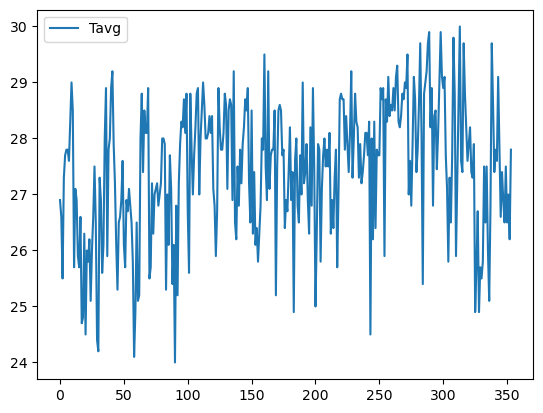

In [12]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

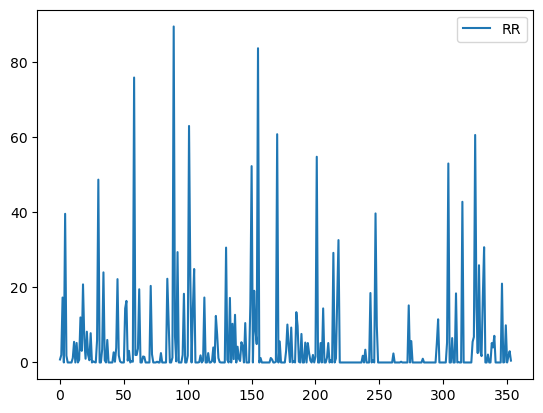

In [13]:
#plotting tavg
df1[['RR']].plot()

In [14]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,23.5,30.8,0.8,26.9,31.0,26.6,2.0
1,31,31,2023-01-02,22.5,31.0,2.0,26.6,28.6,25.5,17.3
2,59,59,2023-01-03,23.4,28.6,17.3,25.5,31.2,27.3,0.0
3,90,90,2023-01-04,23.0,31.2,0.0,27.3,29.9,27.7,39.6
4,120,120,2023-01-05,24.7,29.9,39.6,27.7,32.4,27.8,1.8
...,...,...,...,...,...,...,...,...,...,...
349,349,349,2023-12-16,23.8,32.6,9.9,27.5,30.2,26.5,0.0
350,350,350,2023-12-17,25.0,30.2,0.0,26.5,31.2,27.0,1.6
351,351,351,2023-12-18,24.4,31.2,1.6,27.0,29.2,26.2,3.0
352,352,352,2023-12-19,24.7,29.2,3.0,26.2,32.2,27.8,0.5


In [15]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,0.8,26.9,26.6,2.0
1,2.0,26.6,25.5,17.3
2,17.3,25.5,27.3,0.0
3,0.0,27.3,27.7,39.6
4,39.6,27.7,27.8,1.8
...,...,...,...,...
349,9.9,27.5,26.5,0.0
350,0.0,26.5,27.0,1.6
351,1.6,27.0,26.2,3.0
352,3.0,26.2,27.8,0.5


In [16]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,0.8,26.9,26.6,2.0
1,2.0,26.6,25.5,17.3
2,17.3,25.5,27.3,0.0
3,0.0,27.3,27.7,39.6
4,39.6,27.7,27.8,1.8
...,...,...,...,...
348,0.1,26.5,27.5,9.9
349,9.9,27.5,26.5,0.0
350,0.0,26.5,27.0,1.6
351,1.6,27.0,26.2,3.0


In [17]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,0.8,26.9,26.6,2.0,0
1,2.0,26.6,25.5,17.3,1
2,17.3,25.5,27.3,0.0,2
3,0.0,27.3,27.7,39.6,3
4,39.6,27.7,27.8,1.8,4
...,...,...,...,...,...
348,0.1,26.5,27.5,9.9,348
349,9.9,27.5,26.5,0.0,349
350,0.0,26.5,27.0,1.6,350
351,1.6,27.0,26.2,3.0,351


In [19]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [20]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [21]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
X_test

,Indeks,Tavg
282,282,29.7
283,283,28.1
284,284,25.4
285,285,28.8
286,286,29.0
...,...,...
348,348,26.5
349,349,27.5
350,350,26.5
351,351,27.0


In [23]:
#testing
pred1 = lr.predict(X_test)
pred1

array([28.73380679, 28.17702584, 27.23493229, 28.42957229, 28.50330289,
       28.57703349, 28.75584934, 28.82957994, 28.23777057, 28.48664327,
       27.75472022, 28.31884869, 28.35755086, 27.99397199, 28.22478471,
       28.54371424, 28.86264377, 28.58609017, 28.51970709, 28.59343769,
       28.10671358, 27.90021683, 27.44852114, 27.97762118, 27.70106759,
       28.12508237, 28.86435293, 28.5177425 , 27.50559211, 27.99966373,
       28.49373536, 28.95277856, 28.11577027, 28.04938719, 28.85871458,
       28.54713257, 28.34063581, 28.13413906, 28.24289807, 28.35165709,
       28.0751035 , 28.04374884, 28.25759311, 27.2104143 , 27.49431541,
       27.84827336, 27.22143557, 27.50533668, 27.4389536 , 27.54771262,
       28.1468695 , 27.80025907, 28.15421702, 27.63246449, 27.32088248,
       27.92003936, 28.93953727, 28.55789842, 28.14123115, 28.28501859,
       28.21863551, 28.74773555, 28.29603986, 27.87937259, 28.1632737 ,
       27.99180537, 27.85536545, 28.2093234 , 27.86271297, 28.04

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

1.0260000333295205 1.6490073263460723


In [25]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,29.7
283,283,28.1
284,284,25.4
285,285,28.8
286,286,29.0
...,...,...
348,348,26.5
349,349,27.5
350,350,26.5
351,351,27.0


In [26]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,28.733807
283,28.177026
284,27.234932
285,28.429572
286,28.503303
...,...
348,27.855365
349,28.209323
350,27.862713


In [27]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

C:\Users\rivan\AppData\Local\Temp\ipykernel_7892\2636922572.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,26.9,NaN
1,26.6,NaN
2,25.5,NaN
3,27.3,NaN
4,27.7,NaN
...,...,...
348,26.5,27.855365
349,27.5,28.209323
350,26.5,27.862713
351,27.0,28.041529


<Axes: >

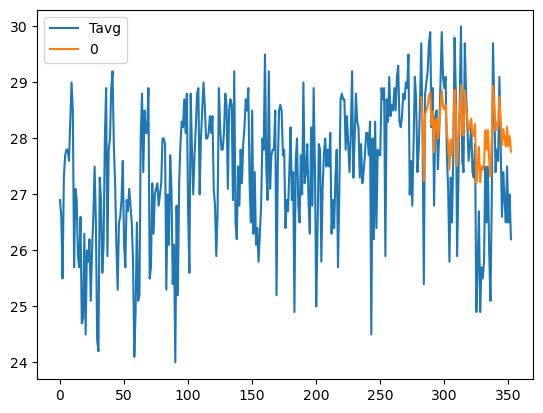

In [28]:
kan.plot()

In [29]:
new_data = [[354, 26.2],[355,26.2],[356,26.2],[357,26.2],[358,26.2],[359,26.2],[360,26.2]]
lr.predict(new_data)

C:\Users\rivan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27.77232274, 27.7759965 , 27.77967026, 27.78334402, 27.78701778,
       27.79069154, 27.79436529])

In [31]:
kan.to_json('Prediksi Bangka Belitung.json')